# Text Analysis for Online Marketers

Text shows up in pretty much all fields of online marketing, in many different ways. I believe having a methodology for analyzing text is very important, because although text comes in different forms, there are structures and patterns that can be used to standardize the process.  
So what kind of text am I talking about, and what kind of analysis? 

#### The Text
Text typically comes as phrases, or short paragraphs along with numbers that describe it: 

Text | Metrics examples
------|-------------
Social media posts | follows, retweets, likes, engagements, impressions
SEM/SEO Keywords | impressions, clicks, conversions, bounce rate
Article titles | page views, engagements, bounce rate
Video titles | video views, likes, dislikes, shares
Page URLs (containing keywords) | page views, bounce rate, conversions
Product names | sales, orders, prices

#### The Analysis

There are numerous text mining techniques and approaches, and I will be focusing on two topics: 

##### 1. Extracting entities:

Although there is a set of techniques that try to figure out parts of a phrase or a sentence (people, countries, subject, predicate, etc.), which is formally called "entity extraction", I'll be extracting much simpler and structured entities. These typically appear in social media posts, and they are hashtags, mentions and emoji. There are others of course (like images, URL's, polls, etc.), but these are the three that I'll be handling.  

* **Hashtags:** Usually the most important words in a social media post, and can easily summarize what the post is about. Many times they are not words in the traditional sense, they can be brands, phrases, movement names, or acronyms. Their main power is that they efficiently summarize what the post is about.  
* **Mentions:** These are not words, but they serve to show connections between a post and another one (also connecting users to one another). They show conversations, and indicate whether or not a certain account(s) is meant to receive a certain message. In a social media posts data set, the more mentions you have, the more 'conversational' the discussion is. In more advanced uses, you can do network analysis, and see who the influential accounts (nodes) are and how they relate to others in terms of importance, power, and centrality to the network of posts.
* **Emoji:** An emoji is worth a thousand words! As images they are very expressive. They are also extremely efficient because they typically use one character each (sometime more though). Once we extract the emoji, we will get their names (represented as short phrases). This will allow us to treat those images as text, and we can run normal text analysis on them. Here are some emoji and their names for example:
    

Emoji | Name
---------|---------
🤣|rolling on the floor laughing
📖| open book
🔥| fire
🍚| cooked rice

##### 2. Word counting (absolute and weighted):

One of the basic things to be done in text mining is counting words (and phrases). A simple count would easily tell us what the text list about. However, we can do more in online marketing, especially that those text lists usually come with numbers that describe them, and can help us count better.  
Let's say we have set of Facebook posts that consist of two posts; "It's raining" and "It's snowing".  
If we count the words we will see that 50% of the posts are about raining and the other 50% are about snowing.  
Now what if I told you that the first post (rain) was published by a page that has one thousand fans/followers, and the other was published by a page that has ninety nine thousand fans?  
Counting the words we get a 50:50 ratio, but if we take into consideration the number of people who are reached by those posts, the ratio becomes 1:99.  
What we can do is count each word of each post not once, but the number of fans that it is expected to reach. This gives us a better idea of the importance of each post.  
What if we now discover another post that says, "It's windy", but this time it's from The Weather Channel who happens to have 8.5 million fans?  

Some other examples to make clearer: 

Assume I have a YouTube channel that teaches dancing, and I have two videos: 

Video Title | Views
---------------|----------------
Learn Salsa | 100 
Learn Tango | 900 

It's clear that the ratio of salsa to tango is 50:50 on an absolute basis, but on a weighted basis, it is 10:90. 

A travel website has a few pages about different cities: 

URL | Pageviews
-------|--------------------
/france/paris | 800 
/spain/madrid | 50 
/spain/barcelona | 50 
/spain/malaga | 50 
/spain/seville | 50 

Although 80% of the content is about Spanish cities, one French city generates 80% of traffic. If we were to send a survey to the site's visitors, and ask them what the website is about, 80% of them are going to remember Paris.  
In other words, in the eyes of the editorial team, they are a "Spanish" website, but in the eyes of readers, they are a "French" website.

The metric could be any other metric; sales, conversions, bounces, whatever you think is relevant for your case.

Finally, here is a real-life example of an analysis I ran on Hollywood movie titles: 

![](hollywood_word_freq.png)

Out of 15,500 movie titles, the most used word is "love", but that word is nowhere to be found in the top 20 list showing the words most associated with boxoffice revenue (it actually ranks 27).  
Of course the title of the movie is not what caused the revenue to be high or low, there are many factors. It still shows that movie producers believe that adding "love" to a title is good idea.  
On the other hand, "man" seems to be popular with producers, and also appears in movies that made a lot of money. 


For our example, I will be using a set of tweets together with their meta data. The tweets will be about the 61st Grammy Awards. The tweets were requested as containing the hashtag #Grammys. The tweets were requested about ten days before the awards.  

### Twitter Setup

In order to be able to send queries and receive responses from the Twitter API, you will need to do the following: 
1. [Apply for access as a developer](https://developer.twitter.com/en/apply-for-access).  Once approved, you will then need to get your account credentials.  
2. [Create an app](https://developer.twitter.com/en/apps). Then you will be able to get the app's credentials.
3. Get credentials by clicking on "details" and then "Keys and tokens" , Then you should see your keys, where they are clearly labelled; API key, API secret key, Access token, and Access token secret. 

Now you should be ready to interact with the Twitter API.  
There are several packages that help with this. I'll be using the Twitter module of the `advertools` package, because it combines several responses into one, and provides them as a DataFrame, which is ready to analyze. This enabls you to request a few thousand tweets with one line of code, and start analyzing right away.  
A DataFrame is simply a table of data. This is the data structure that is used by the popular data science languages, and it refers to a table that contains rows for every observation, and columns for every variable describing the observations. Each column would have one type of data in it (dates, text, integers, etc.). This is typically what we have when we analyze data, or export report for online marketing.  

### Overview of the third party Python packages used: 

1. [advertools](https://github.com/eliasdabbas/advertools): This package provides a set of tools for online marketing productivity and analysis. I wrote and maintain it, and it will be used for: 
    * Connecting to Twitter and getting the combined responses in one DataFrame
    * Extracting entities with the "extract_" functions. 
    * Counting words with the "word_frequency" function. 
2. [pandas](https://pandas.pydata.org/): This is one of the most popular and important Python packages, especially for data science applications, and it is mainly used for data manipulation; sorting, filtering, pivot tables, and all sorts of tools required for data analysis.  
3. [matplotlib](https://matplotlib.org/): This will be mainly used for data visualization. 

We first set up some variables and import the packages. The variables required will be the credentials we got from the Twitter apps dashboard.

In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import advertools as adv
import pandas as pd
pd.set_option('display.max_columns', None)


app_key = 'YOUR_APP_KEY'
app_secret = 'YOUR_APP_SECRET'
oauth_token = 'YOUR_OAUTH_TOKEN'
oauth_token_secret = 'YOUR_OAUTH_TOKEN_SECRET'


auth_params = {
    'app_key': app_key,
    'app_secret': app_secret,
    'oauth_token': oauth_token,
    'oauth_token_secret': oauth_token_secret,
}
adv.twitter.set_auth_params(**auth_params)

The first few lines make available the packages that we will be using as well as define some settings, while the second part defines the API credentials as variables with short names and sets up the login process. Now whenever you make a request to Twitter, the credentials will be included in your request and allow you to get your data.   
Now we are ready to request our main data set. In the code below, we define a variable called `grammys` that will be used to refer to the DataFrame (table) of tweets that contain they keywords that we want.  
The query used is `#Grammys -filter:retweets`.  
Note that we are filtering out retweets.  
The reason I like to remove retweets is that they are mainly repeating what other people are saying. I'm usually more interested in what people actively say, which is a better indication of what they feel or think. There are definitely cases where including retweets makes sense. We also specify the number of tweets that we want. I specified 5,000. There are certain limits to how many you can retrieve and you can check these out from Twitter's documentation. 

In [2]:
# grammys = adv.twitter.search(q='#Grammys -filter:retweets', lang='en',
#                               count=5000, tweet_mode='extended')

In [3]:
grammys = pd.read_csv('grammys.csv', parse_dates=['tweet_created_at', 'user_created_at'])

Now we have our DataFrame so let's start by exploring it a little.

In [4]:
grammys.shape

(2914, 78)

The "shape" of a DataFrame is an attribute that shows the number of rows and columns respectively.  
As you can see, we have 2,914 rows (tweets), and we have 78 columns.  
Let's see what these columns are: 

In [5]:
grammys.columns

Index(['tweet_contributors', 'tweet_coordinates', 'tweet_created_at',
       'tweet_display_text_range', 'tweet_entities', 'tweet_entities_mentions',
       'tweet_entities_hashtags', 'tweet_entities_urls',
       'tweet_entities_symbols', 'tweet_entities_media',
       'tweet_extended_entities', 'tweet_favorite_count', 'tweet_favorited',
       'tweet_full_text', 'tweet_geo', 'tweet_id', 'tweet_id_str',
       'tweet_in_reply_to_screen_name', 'tweet_in_reply_to_status_id',
       'tweet_in_reply_to_status_id_str', 'tweet_in_reply_to_user_id',
       'tweet_in_reply_to_user_id_str', 'tweet_is_quote_status', 'tweet_lang',
       'tweet_metadata', 'tweet_place', 'tweet_possibly_sensitive',
       'tweet_quoted_status', 'tweet_quoted_status_id',
       'tweet_quoted_status_id_str', 'tweet_retweet_count', 'tweet_retweeted',
       'tweet_source', 'tweet_truncated', 'tweet_user',
       'user_contributors_enabled', 'user_created_at', 'user_default_profile',
       'user_default_profile_imag

Out of those columns there are maybe 20-30 that you won't usually use, but the rest can be really useful.  
The names of columns start with either "tweet_" or "user_". This means that the column contains data about the tweet itself, or about the user who tweeted that tweet, respectively.  
Now, let's use the `tweet_created_at` column to see what date and time range our tweets fall into. 

In [6]:
(grammys['tweet_created_at'].min(), 
 grammys['tweet_created_at'].max(), 
 grammys['tweet_created_at'].max() - grammys['tweet_created_at'].min())

(Timestamp('2019-01-22 01:40:26+0000', tz='UTC'),
 Timestamp('2019-02-01 03:14:18+0000', tz='UTC'),
 Timedelta('10 days 01:33:52'))

We took the minimum and maximum date/time values, and then got the difference.  
The 2,914 tweets were tweeted in ten days. Although we requested five thousand, we got a little more than half that. It seems not many people are tweeting about the event yet. Had we requested the data during the awards, we would probably get 5,000 every fifteen minutes.  
If you were following this event, or participating in the discussion somehow, you would probably need to run the same analysis, everyday in the week or two before the event. This way you would know who is active and influential, and how things are progressing.  
Now let's see who the top users are. The following code takes the `grammys` DataFrame, selects four columns by name, sorts the rows by the column `user_followrs_count`, drops the duplicated values, and display the first twenty rows. Then it formats the followers' numbers by adding a thousand separator, to make it easier to read. 

In [7]:
(grammys
 [['user_screen_name', 'user_name', 'user_followers_count', 'user_verified']]
 .sort_values('user_followers_count', ascending=False)
 .drop_duplicates('user_screen_name')
 .head(20)
 .style.format({'user_followers_count': '{:,}'}))

,user_screen_name,user_name,user_followers_count,user_verified
1423,MTV,MTV,"15,487,838",True
2244,enews,E! News,"11,515,137",True
2495,Camila_Cabello,camila,"7,835,551",True
1535,billboard,billboard,"7,022,643",True
253,RollingStone,Rolling Stone,"6,283,981",True
2474,PerezHilton,Perez Hilton,"6,081,578",True
2206,MTVNEWS,MTV NEWS,"5,165,984",True
2716,GMA,Good Morning America,"3,601,277",True
281,THR,Hollywood Reporter,"2,939,443",True
387,RecordingAcad,Recording Academy / GRAMMYs,"2,802,919",True


It seems the largest accounts are mainly mainstream media and celebrities accounts, and all of them are verified accounts. We have two accounts with more than ten million followers, which have the power to tilt the conversation one way or the other.  

In [8]:
grammys.drop_duplicates('user_screen_name')['user_verified'].value_counts()

False    1565
True      274
Name: user_verified, dtype: int64

274 out of 1,565+274=1,839 accounts (around 15%) are verified. That's quite high and is expected for such a topic.  

Another interesting column is the `tweet_source` column. This tell us what application the user used to make that tweet.  
The following code shows the counts of those applications in three different forms:  
1. `number`: the absolute number of tweets made with that application
2. `percentage`: the percentage of tweets made with that application (17.5% were made with the Twitter Web Client for example)
3. `cum_percentage`: the cumulative percentage of tweets made with applications up to the current row (web, iPhone, and Android combined, were used to make 61.7% of tweets for example)

In [9]:
(pd.concat([grammys['tweet_source'].value_counts()[:15].rename('number'), 
            grammys['tweet_source'].value_counts(normalize=True)[:15].mul(100).rename('percentage'),
            grammys['tweet_source'].value_counts(normalize=True)[:15].cumsum().mul(100).rename('cum_percentage')], axis=1)
 .reset_index()
 .rename(columns={'index': 'tweet_source'}))

,tweet_source,number,percentage,cum_percentage
0,Twitter for iPhone,745,25.566232,25.566232
1,Twitter for Android,542,18.599863,44.166095
2,Twitter Web Client,511,17.536033,61.702128
3,TweetDeck,219,7.515443,69.217570
4,Instagram,153,5.250515,74.468085
5,Hootsuite Inc.,141,4.838710,79.306795
6,Twitter Web App,103,3.534660,82.841455
7,Sprout Social,70,2.402196,85.243651
8,IFTTT,58,1.990391,87.234043
9,Buffer,57,1.956074,89.190117


So, people are mostly tweeting with their phones, and the iPhone app was used in 25.5% of the tweets, and Android in 18.6%.  
In case you didn't know, IFTTT (If This Then That on row 8) is an app that automates many things, which you can program to fire certain events when certain conditions are satisfied. So with Twitter, a user can probably retweet any tweet that is tweeted by a certain account and containing a certain hashtag for example.  
In our data set, fifty eight tweets are from IFTTT, so these are automated tweets. TweetDeck and Hootsuite are used by people or agencies who run social media account professionally and need the scheduling and automation that they provide.  
This gives us some hints about how our users are tweeting, and might also give some insights on the relative popularity of the apps themselves and what kind of accounts use them.  
There are more things that can be explored, but let's start extracting the entities and see what we can find.

## Emoji

There are currently three "extract_" functions, which work pretty much the same way, and produce almost the same output. `extract_emoji`, `extract_hashtags`, and `extract_mentions` all take a text list, and return a Python "dictionary".  
This dictionary is similar to a normal dictionary, in the sense it has keys and values, in place of words and their meanings, respecitvely.  
In order to access the value of a certain key from the dictionary, you can use `dictionary[key]` and that gives you the value of the of the key saved in the dicionary. We will go through examples below to demonstrate this.  
This is technically not a correct description of the Python dictionary data structure, but just a way to think about it if you are not familiar with it. 

In [10]:
emoji_summary = adv.extract_emoji(grammys['tweet_full_text'])

We create a variable `emoji_summary`,  which is a Python dictionary. Let's quickly see what its keys are.

In [11]:
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'overview'])

We will now explore the most important ones.

In [12]:
emoji_summary['overview']

{'num_posts': 2914,
 'num_emoji': 2007,
 'emoji_per_post': 0.6887439945092656,
 'unique_emoji': 325}

The `overview` key contains a general summary about the emoji. As you can see, we have 2,914 posts, with 2007 occurrences of emojis. We have around 69% emoji per post, and the posts contain 325 unique emoji.  
The average is around 69%, but it's always useful to see how the data are distributed. We can have a better view of that by accessing the `emoji_freq` key. This shows how frequenty the emoji were used in our tweets. 

In [13]:
emoji_summary['emoji_freq']

[(0, 2169),
 (1, 326),
 (2, 176),
 (3, 98),
 (4, 45),
 (5, 31),
 (6, 21),
 (7, 15),
 (8, 5),
 (9, 3),
 (10, 3),
 (11, 3),
 (12, 7),
 (13, 5),
 (15, 1),
 (16, 1),
 (18, 1),
 (20, 1),
 (26, 1),
 (30, 1),
 (65, 1)]

We have 2,169 tweets with zero emojis, 326 tweets with one emoji, and so on.  
Let's quickly visualize the above data.

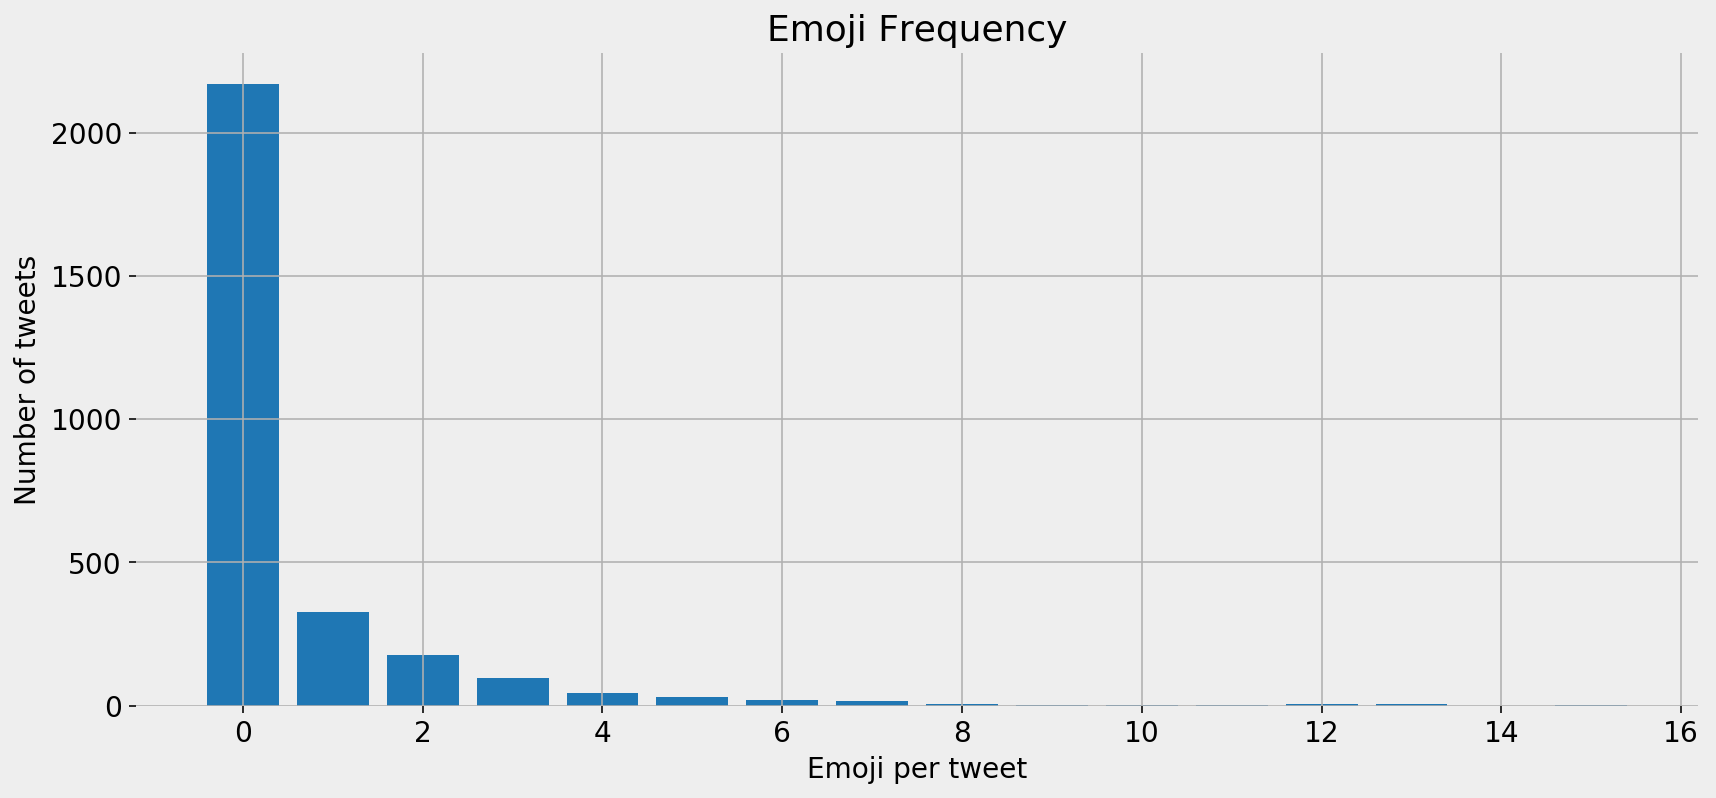

In [14]:
fig, ax = plt.subplots(facecolor='#eeeeee')
fig.set_size_inches((14, 6))
ax.set_frame_on(False)
ax.bar([x[0] for x in emoji_summary['emoji_freq'][:15]],
       [x[1] for x in emoji_summary['emoji_freq'][:15]])
ax.tick_params(labelsize=14)
ax.set_title('Emoji Frequency', fontsize=18)
ax.set_xlabel('Emoji per tweet', fontsize=14)
ax.set_ylabel('Number of tweets', fontsize=14)
ax.grid()
plt.show()

You are probably wondering what the top emoji used were. These can be extracted by accessing the `top_emoji` key.

In [15]:
emoji_summary['top_emoji'][:20]

[('🏆', 198),
 ('❤', 147),
 ('🔥', 78),
 ('😍', 62),
 ('🎶', 56),
 ('👏', 48),
 ('✨', 46),
 ('😭', 35),
 ('💜', 34),
 ('🙌', 30),
 ('📀', 30),
 ('🙏', 28),
 ('🇰🇷', 28),
 ('👀', 27),
 ('👇', 26),
 ('💥', 25),
 ('🎤', 23),
 ('🤩', 22),
 ('🤔', 21),
 ('👑', 21)]

Here are the names of the top twenty emoji.

In [16]:
emoji_summary['top_emoji_text'][:20]

[('trophy', 198),
 ('red heart', 147),
 ('fire', 78),
 ('smiling face with heart-eyes', 62),
 ('musical notes', 56),
 ('clapping hands', 48),
 ('sparkles', 46),
 ('loudly crying face', 35),
 ('purple heart', 34),
 ('raising hands', 30),
 ('dvd', 30),
 ('folded hands', 28),
 ('South Korea', 28),
 ('eyes', 27),
 ('backhand index pointing down', 26),
 ('collision', 25),
 ('microphone', 23),
 ('star-struck', 22),
 ('thinking face', 21),
 ('crown', 21)]

There seems to be a bug somehwere, causing the red heart to appear as black above. It is actually red, as you will see below.  
Now we simply combine the emoji with their textual representation together with their frequency.

In [17]:
for emoji, text in (zip([x[0] for x in emoji_summary['top_emoji'][:20]], 
emoji_summary['top_emoji_text'][:20], )):
    print(emoji,*text, sep=' ')

🏆 trophy 198
❤ red heart 147
🔥 fire 78
😍 smiling face with heart-eyes 62
🎶 musical notes 56
👏 clapping hands 48
✨ sparkles 46
😭 loudly crying face 35
💜 purple heart 34
🙌 raising hands 30
📀 dvd 30
🙏 folded hands 28
🇰🇷 South Korea 28
👀 eyes 27
👇 backhand index pointing down 26
💥 collision 25
🎤 microphone 23
🤩 star-struck 22
🤔 thinking face 21
👑 crown 21


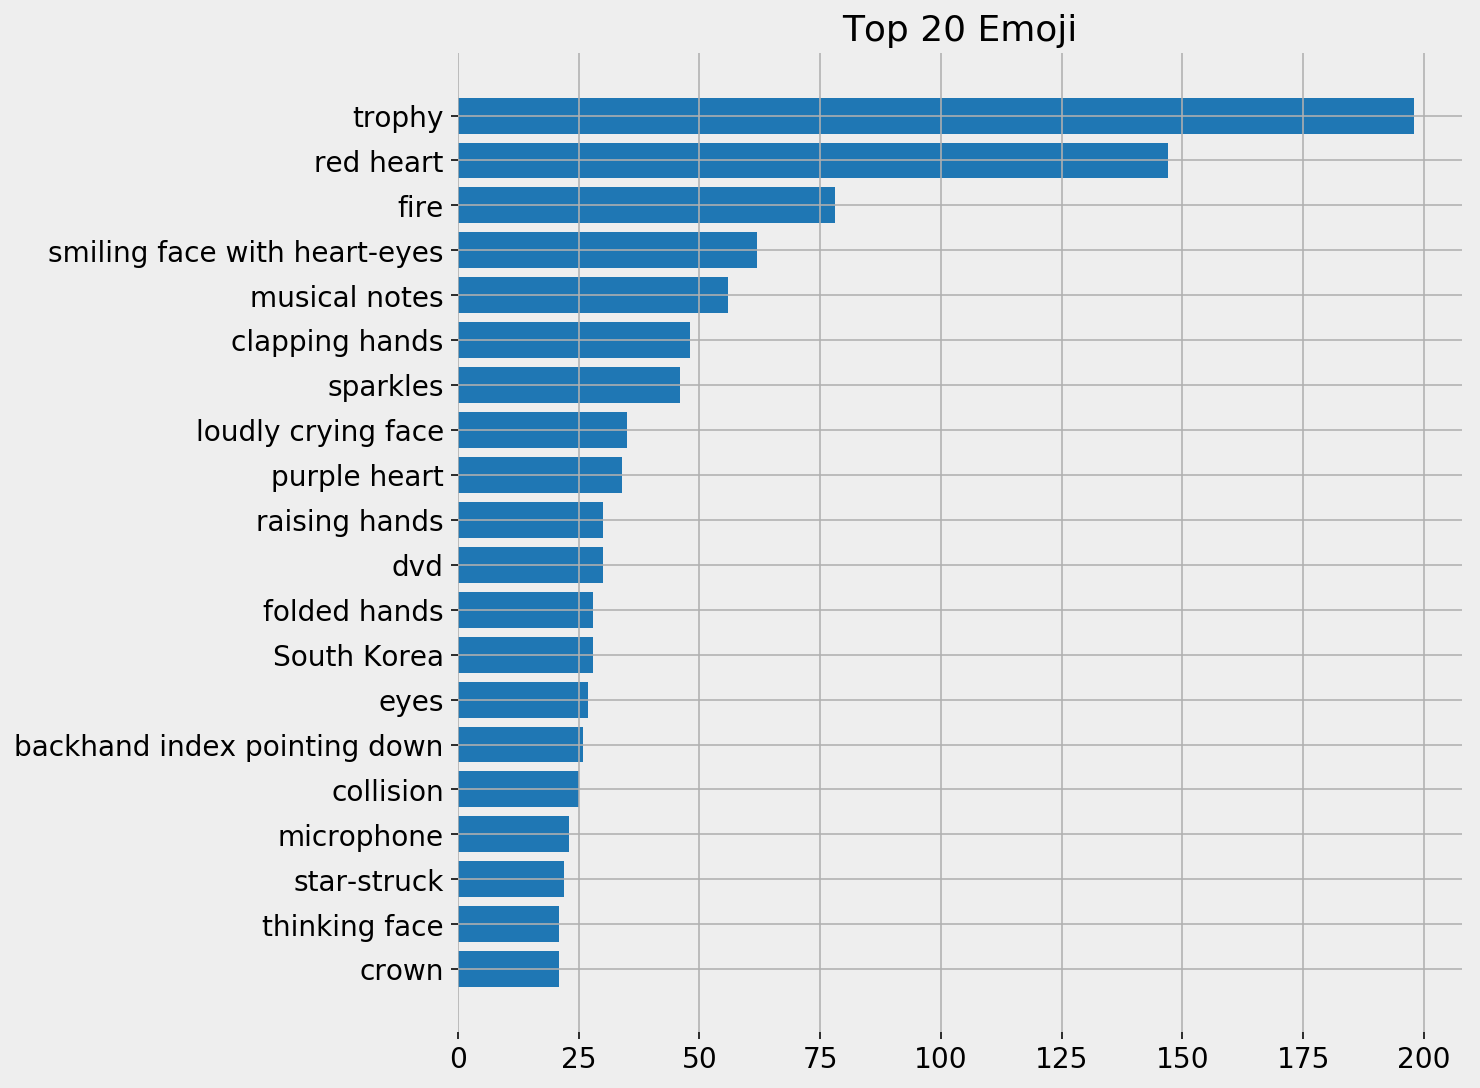

In [18]:
fig, ax = plt.subplots(facecolor='#eeeeee')
fig.set_size_inches((9, 9))
ax.set_frame_on(False)
ax.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
        [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
ax.tick_params(labelsize=14)
ax.set_title('Top 20 Emoji', fontsize=18)
ax.grid()
plt.show()

The trophy and red heart emojis seems to be by far the most used.  
Let's see how people are using them. Here are the tweets containing them.

In [19]:
print(*[x for x in grammys[grammys['tweet_full_text'].str.contains('🏆')]['tweet_full_text']][:10], sep='\n---------\n')

Music Statistics on Music Artist #MariahCarey based on the 48 songs she has charted:

🏆 37% of her songs were #1 hits
🏆 58% of her songs were top 10 hits
🏆 2 songs on BB 100 Biggest Hits of All time (#14#38) 
🏆 5 #Grammys won
🏆 ~288 awards won
🏆 Most #1's for a soloist(18) https://t.co/LfvIQP3dVY
---------
@taylorchart13 ts stan ☺ and LEONARDO DAVIN ADMAJA 
TAN follow

Taylor Charts
@taylorchart13

9 years ago, Taylor Swift made
history in the music industry,
becoming the youngest person to
win the Album at the #GRAMMYs 
with "Fearless." 🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆📀📀📀📀📀📀📀📀📀📀📀📀❤🔱💍😘
---------
Music Statistics on Music Band #DestinysChild based on the 14 songs they have charted:

🏆 28% of their songs were #1 hits.
🏆 71% of their songs were top 10 hits.
🏆 2 total #Grammys won
🏆 ~60 total Awards won https://t.co/jF5PVcnHUK
---------
Music Statistics on Music Artist #TaylorSwift based on the 77 songs she has charted:

🏆 6% of her songs were #1 hits.
🏆 28% of her songs were top 10 hits.
🏆 10 total #GRAMMYs

In [20]:
print(*[x for x in grammys[grammys['tweet_full_text'].str.contains('❤️')]['tweet_full_text']][:15], sep='\n----------\n')

.@Xtina showed support for fellow #GRAMMYs nominee @ddlovato ❤️!

#Lovatics #Fighters #DemiLovato https://t.co/2muDLDCPCS
----------
@backstreetboys @RecordingAcad BLACKPINK!! BLACKPINK!! IN THE #GRAMMYs 2019🍿🔥🔥❤️ https://t.co/Ry31Ba5FHs
----------
@RecordingAcad Shawn Mendes ❤️ #GRAMMYs
----------
I love seeing my boys in this list of nominees. ☺️ Is it 1999 again? ❤️ #BSBDNA @backstreetboys @nickcarter @brian_littrell @aj_mclean @kevinrichardson @howied @RecordingAcad  #GRAMMYs https://t.co/kopU6lc68Y
----------
s/o to the #Russian #Roulettes of #Egypt tatiana_sayfutdinova vi_92vi &amp; olgakadry ❤️👑❤️ 🙌🏾 for this #sexy video with my #song “Needa Gyal” Ft. @bamababymusic 🤘🏾#grammys #platinum #singer… https://t.co/AqxEtNVcJX
----------
@backstreetboys After "ABCs" and "Twinkle Twinkle Little Star", what's next? A kids album, maybe?
Would be so great!! 😄❤️

#GRAMMYs 
#GRAMMYsAskBSB 
#BSBDNA
----------
@backstreetboys I watched video of you serenading a baby with "ABCs" and it sounds am

Let's learn a little more about the tweets and users who made those tweets.  
The following filters tweets containing the trophy, sorts them in descending order, and shows the top ten (sorted by the users' followers).

In [21]:
pd.set_option('display.max_colwidth', 280)
(grammys[grammys['tweet_full_text'].str.count('🏆') > 0]
 [['user_screen_name', 'user_name', 'tweet_full_text', 'user_followers_count', 
   'user_statuses_count', 'user_created_at']]
 .sort_values('user_followers_count', ascending=False)
 .head(10)
 .style.format({'user_followers_count': '{:,}'}))

,user_screen_name,user_name,tweet_full_text,user_followers_count,user_statuses_count,user_created_at
1423,MTV,MTV,Here's everything we know about the 2019 #GRAMMYs so far 🏆 https://t.co/Wj7Z1y9N6P,"15,487,838",274624,2007-03-26 22:30:49+00:00
714,1027KIISFM,102.7 KIIS-FM,That #GRAMMYs winner leak is NOT real according to the @RecordingAcad 🏆! Thoughts? #GRAMMYsAwards #GRAMMYs2019 https://t.co/qBXiSPSPgF,"331,959",111497,2009-01-16 00:05:12+00:00
1903,4Music,4Music,"We're bringing you music's BIGGEST night.🏆 Catch the @RecordingAcad #GRAMMYs on @4Music ⚡️ Monday 11th Feb, 7:30pm. https://t.co/R6e8yu7jZA","161,927",61318,2009-06-08 10:51:15+00:00
526,4Music,4Music,"Music's BIGGEST night is coming to @4Music! 🏆👏 Pop Monday 11th Feb, 7:30pm in your diaries, because we'll be showing the UK exclusive @RecordingAcad #GRAMMYs 😁🙌 https://t.co/jBqtmiXcBD","161,927",61318,2009-06-08 10:51:15+00:00
550,SoundHound,SoundHound,"🏆 The #GRAMMYs are coming! We've got music from all the nominees and performers including @JanelleMonae, @iamcardib, and @PostMalone right in SoundHound. ↪️ https://t.co/nNk0rujdXj https://t.co/sa3mm6C4iJ","109,517",11392,2009-11-20 20:03:54+00:00
1844,beatlesstory,The Beatles Story,The Beatles were awarded a special lifetime achievement award at the #GRAMMYs on this day in 2014. @RecordingAcad 🏆 https://t.co/kwpPE8jPUi,"56,409",9848,2009-02-11 11:27:41+00:00
1451,MendesCrewInfo,Shawn Mendes Updates,The 61st #GRAMMYs are two weeks away! @ShawnMendes is nominated for ‘Song of the Year’ (‘In My Blood’) and ‘Best Pop Vocal Album’ (‘Shawn Mendes’) AND he will be performing. Can’t wait! 🏆❤️ https://t.co/w9JOGKFqEX,"51,288",26437,2017-08-05 23:05:26+00:00
2711,1043MYfm,1043 MYfm,.@JoshuaDun keeps his #GRAMMYs award in his studio 🏆! Where would you keep yours if you won? #TwentyOnePilots #SkeletonClique https://t.co/zup7Mnmwe1,"23,719",51917,2009-03-03 20:14:49+00:00
675,1043MYfm,1043 MYfm,The @RecordingAcad says the leaked list of #GRAMMYs winners is NOT real 🏆! #GRAMMYs2019 https://t.co/bAMVd5seDi,"23,719",51917,2009-03-03 20:14:49+00:00
2152,_DionneWarwick,Dionne Warwick,I am so honored by the recognition from @RecordingAcad for the lifetime achievement award. 🏆 #GRAMMYs,"22,595",1832,2012-10-12 03:58:27+00:00


In [22]:
pd.set_option('display.max_colwidth', 280)
(grammys[grammys['tweet_full_text'].str.count('❤️') > 0]
 [['user_screen_name', 'user_name', 'tweet_full_text', 'user_followers_count', 
   'user_statuses_count', 'user_created_at']]
 .sort_values('user_followers_count', ascending=False)
 .head(10)
 .style.format({'user_followers_count': '{:,}'}))

,user_screen_name,user_name,tweet_full_text,user_followers_count,user_statuses_count,user_created_at
74,1027KIISFM,102.7 KIIS-FM,.@Xtina showed support for fellow #GRAMMYs nominee @ddlovato ❤️! #Lovatics #Fighters #DemiLovato https://t.co/2muDLDCPCS,"331,959",111497,2009-01-16 00:05:12+00:00
1439,hitsradiouk,Hits Radio,Coming in at #2 on #TheUKChartShow we have @MarkRonson & @MileyCyrus with ‘Nothing Breaks Like A Heart’ 💔 This week Miley has announced she will be performing at the #GRAMMYs - we cannot wait 🎶❤️ 🔊 : https://t.co/hQF3tdXTM7 https://t.co/tvpmxtM6Pg,"152,517",45213,2010-03-02 21:56:09+00:00
1447,MP3Waxx,MP3Waxx.com,#cardib She Kill This Part How She Was Moving 🔥🤤🤤❤️❤️😍😍😍😍😍 #iamcardib #cardib #bardigang #fanpage #fanlove #viral #instagram #muchlove #explore #cardidifferent #watch #grammys #2019… https://t.co/4CmX8DaUUE,"141,071",18831,2009-04-16 23:27:41+00:00
1505,sonymusicsg,Sony Music Singapore,We're always wanting more of @HERMusicx and we've been blessed with another episode of 'Road To #GRAMMYs'! 😍 Watch episode 3 ▶️ https://t.co/gUzj1hkd4g ✨ and stream her EP #IUsedToKnowHerPart2 out now! ❤️ https://t.co/wa9criDUwg,"60,729",43585,2009-10-19 09:00:37+00:00
1451,MendesCrewInfo,Shawn Mendes Updates,The 61st #GRAMMYs are two weeks away! @ShawnMendes is nominated for ‘Song of the Year’ (‘In My Blood’) and ‘Best Pop Vocal Album’ (‘Shawn Mendes’) AND he will be performing. Can’t wait! 🏆❤️ https://t.co/w9JOGKFqEX,"51,288",26437,2017-08-05 23:05:26+00:00
2745,SMendesQandA,Mendes Updates,The day he was nominated for 2 #GRAMMYs ❤️ 📸 davidsdisponsables on IG https://t.co/s6PUyE4XQ4,"37,074",13026,2017-04-27 13:15:28+00:00
166,SMendesQandA,Mendes Updates,@RecordingAcad Shawn Mendes ❤️ #GRAMMYs,"37,074",13026,2017-04-27 13:15:28+00:00
2613,markdante1,Mark,❤️Any Other Way #JackieShane #GRAMMYs https://t.co/9iRdWtkJfu,"36,031",32190,2009-04-20 19:02:26+00:00
1777,markdante1,Mark,"#JackieShane ❤️ ""Any Other Way"" #GRAMMYs https://t.co/9iRdWtkJfu","36,031",32190,2009-04-20 19:02:26+00:00
1688,New1027,NEW 102.7,"#MileyCyrus will be performing at the #GRAMMYs on Sunday, Feb 10th!!! ❤️ https://t.co/JwLlTfyGur","10,551",41190,2009-02-23 16:44:36+00:00


## Hashtags

We do the same with hashtags.

In [23]:
hashtag_summary = adv.extract_hashtags(grammys['tweet_full_text'])

In [24]:
hashtag_summary['overview']

{'num_posts': 2914,
 'num_hashtags': 9661,
 'hashtags_per_post': 3.3153740562800276,
 'unique_hashtags': 2751}

In [25]:
hashtag_summary['hashtag_freq'][:11]

[(1, 1287),
 (2, 524),
 (3, 368),
 (4, 165),
 (5, 129),
 (6, 62),
 (7, 61),
 (8, 50),
 (9, 46),
 (10, 27),
 (11, 26)]

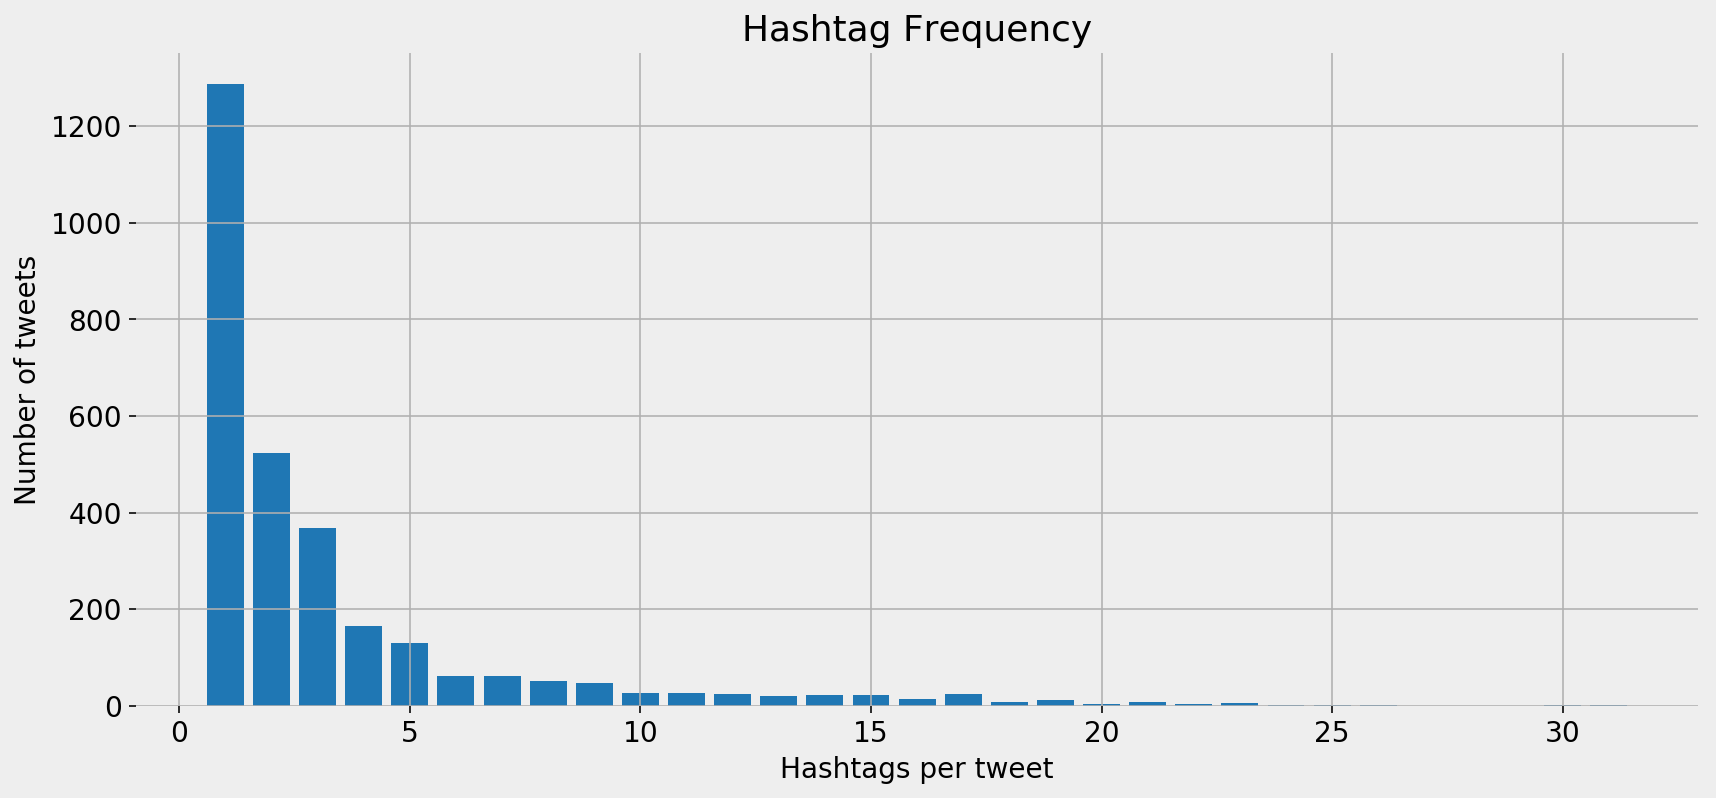

In [26]:
fig, ax = plt.subplots(facecolor='#eeeeee')
fig.set_size_inches((14, 6))
ax.set_frame_on(False)
ax.bar([x[0] for x in hashtag_summary['hashtag_freq']],
       [x[1] for x in hashtag_summary['hashtag_freq']])
ax.tick_params(labelsize=14)
ax.set_title('Hashtag Frequency', fontsize=18)
ax.set_xlabel('Hashtags per tweet', fontsize=14)
ax.set_ylabel('Number of tweets', fontsize=14)
ax.grid()
plt.show()

In [27]:
hashtag_summary['top_hashtags'][:20]

[('#grammys', 2941),
 ('#music', 157),
 ('#grammy', 86),
 ('#oscars', 80),
 ('#grammysaskbsb', 79),
 ('#bsbdna', 67),
 ('#beberexha', 59),
 ('#hiphop', 47),
 ('#grammyawards', 46),
 ('#cardib', 42),
 ('#spotify', 41),
 ('#1', 38),
 ('#superbowl', 35),
 ('#billboard', 34),
 ('#singer', 31),
 ('#rap', 29),
 ('#nipseyhussle', 28),
 ('#drake', 26),
 ('#redcarpet', 25),
 ('#letshearit', 23)]

I like to think of this as my own customized "Trending Now" list. Most of those would probably not be trending in a certain city or country, but because I'm following a certain topic, it is useful for me to keep track of things this way. 
You might be wondering what #grammysaskbsb is. It seems the Grammys are allowing people to submit questions to celebrities. In this hashtag it is for "bsb" which is the Backstreet Boys.  
Let's see who else they are doing this for.  
The following code selects the hashtags that contain "grammysask".  

In [28]:
[(hashtag, count) for hashtag, count in hashtag_summary['top_hashtags'] if 'grammysask' in hashtag]

[('#grammysaskbsb', 79),
 ('#grammysasklbt', 18),
 ('#grammysasktori', 10),
 ('#grammysaskluke', 2)]

Here are the hashtags visualized, excluding #Grammys, since by definition, all tweets contain it. 

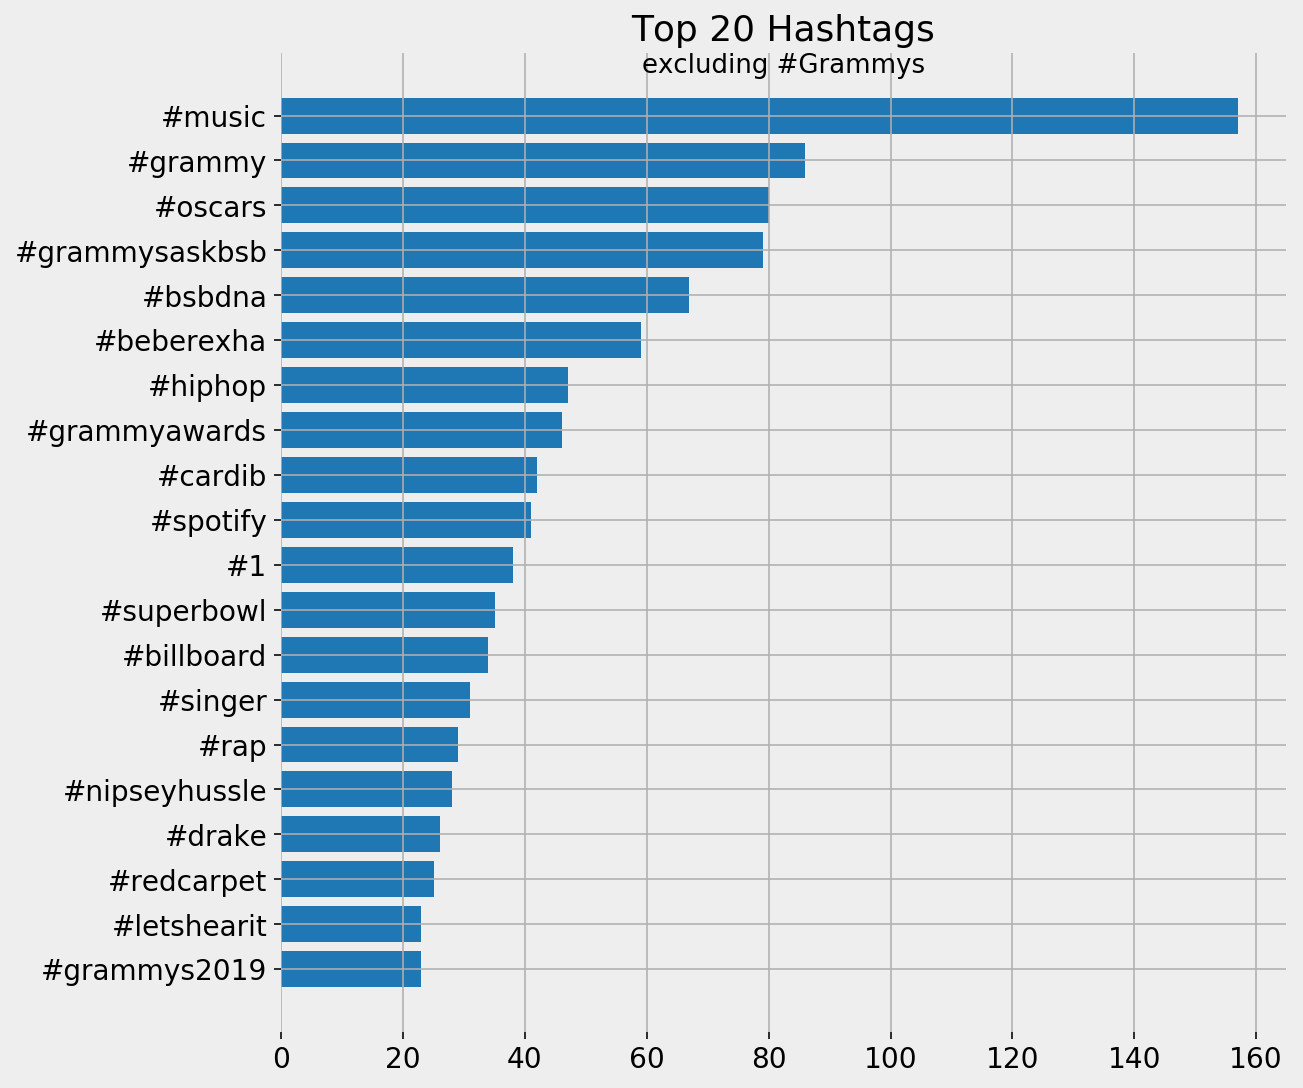

In [29]:
fig, ax = plt.subplots(facecolor='#eeeeee')
fig.set_size_inches((9, 9))
ax.set_frame_on(False)
ax.barh([x[0] for x in hashtag_summary['top_hashtags'][1:21]][::-1],
        [x[1] for x in hashtag_summary['top_hashtags'][1:21]][::-1])
ax.tick_params(labelsize=14)
ax.set_title('Top 20 Hashtags', fontsize=18)
ax.text(0.5, .98, 'excluding #Grammys',
        transform=ax.transAxes, ha='center', fontsize=13)
ax.grid()
plt.show()

It's interesting to see #oscars in the top hashtags. Let's see the tweets containing it.  
Note that the code is pretty much the same as the one above, except that I changed the hashtag. So it's very easy to come up with your own filter and analyze another keyword or hashtag.

In [30]:
(grammys
 [grammys['tweet_full_text'].str.contains('#oscars', case=False)]
 [['user_screen_name', 'user_name', 'user_followers_count','tweet_full_text', 'user_verified']]
 .sort_values('user_followers_count', ascending=False)
 .head(20)
 .style.format({'user_followers_count': '{:,}'}))

,user_screen_name,user_name,user_followers_count,tweet_full_text,user_verified
2727,gagadaily,Gaga Daily,"480,729","$400 million gross (still playing) 8 #Oscars nominations (pending) 7 #BAFTA nominations (pending) 4 #Grammys nominations (pending) [also eligible in 2020] 5 Golden Globe nominations, 1 win 90% on @RottenTomatoes No. 1 selling iTunes movie No. 1 album, 15 weeks in Top 10 (so far) https://t.co/9syol6UkNn",False
2017,MicMost,Mic Most,"19,256",Going to be kinda busy over the next month. • • • • #belize #grammys #grammysweekend #sourceawards #grammysnom #blackhistory365 #mlkday #boycott #blackhistorymonth #ihaveadream #mlk #oscars #blackhistory... https://t.co/nvywJZLYIJ,False
2292,DStv_Ghana,DStvGhana,"13,562","Brace yourself folks! The #Grammys and #Oscars are coming your way on 11th February and 25th February, respectively...from the red carpet to the main show. Stay connected and upgrade to watch! https://t.co/bvUsrWiqCC",False
2410,EmmyARTPOP,Emmy Mason🌎LADY GAGA⭐️,"13,187",Always Remember Us This Way @ladygaga #AStarIsBorn #Oscars #GRAMMYS https://t.co/m9sJVLl2Vo,False
2507,EmmyARTPOP,Emmy Mason🌎LADY GAGA⭐️,"13,187",@ladygaga @TheAcademy Congratulations Lady Gaga! I feel like I’ve won an Academy Award! I am so proud of you & so glad you have that beautiful voice to share with the world! Your music and your journey have helped me thru 10 years of joy & 2 major surgeries! You’re my hero! #Oscars #Grammys +,False
1504,EmmyARTPOP,Emmy Mason🌎LADY GAGA⭐️,"13,187",#HappyBirthday To Me #Twitter @ladygaga #AStarIsBorn #GagaVegas #Enigma #Shallow #Oscars #Grammys https://t.co/uWGnonjLr3,False
1509,EmmyARTPOP,Emmy Mason🌎LADY GAGA⭐️,"13,187",@KevinMcCarthyTV @ladygaga @ladygaga Today’s my birthday! #Oscars #Grammys #ladygaga #GoldenGlobes #CriticsChoice #SAGAwards #AStarIsBorn #SHALLOW,False
1719,EmmyARTPOP,Emmy Mason🌎LADY GAGA⭐️,"13,187",A Star Is Born (Original Motion Picture Soundtrack) - Lady Gaga & Bradley Cooper #Grammys #Oscars https://t.co/AmuUhejl3q,False
592,EmmyARTPOP,Emmy Mason🌎LADY GAGA⭐️,"13,187",SHALLOW #1 ⁦@ladygaga⁩ #AStarIsBorn #Grammys #Oscars #SHALLOW ⁦@MarkRonson⁩ https://t.co/niVcqbluUd,False
1342,EmmyARTPOP,Emmy Mason🌎LADY GAGA⭐️,"13,187",3 more shows until May 30 @ladygaga ⁦@ParkTheaterLV⁩ Las Vegas #GagaVegas #Enigma #GRAMMYS #OSCARS #AStarIsBorn https://t.co/OWd5lUDZxe,False


So, one user has been tweeting a lot about the Oscars, and that is why it is so prominent. 

## Mentions

In [31]:
mention_summary = adv.extract_mentions(grammys['tweet_full_text'])

In [32]:
mention_summary['overview']

{'num_posts': 2914,
 'num_mentions': 3411,
 'mentions_per_post': 1.1705559368565546,
 'unique_mentions': 1056}

In [33]:
mention_summary['mention_freq']

[(0, 1244),
 (1, 884),
 (2, 386),
 (3, 173),
 (4, 102),
 (5, 49),
 (6, 27),
 (7, 21),
 (8, 12),
 (9, 7),
 (10, 1),
 (11, 1),
 (12, 3),
 (14, 2),
 (15, 2)]

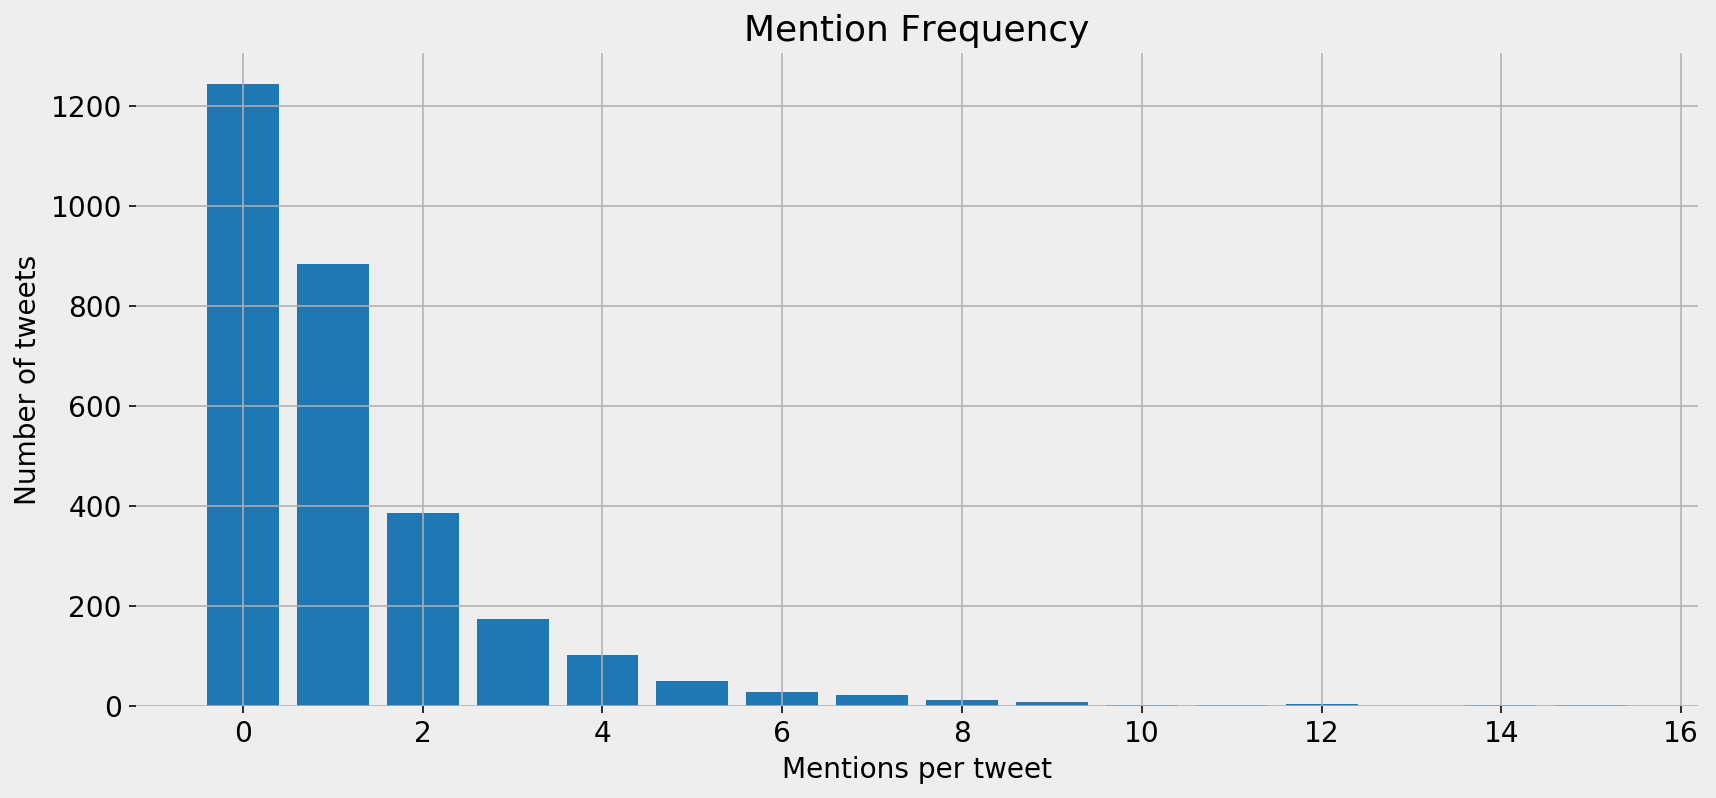

In [34]:
fig, ax = plt.subplots(facecolor='#eeeeee')
fig.set_size_inches((14, 6))
ax.set_frame_on(False)
ax.bar([x[0] for x in mention_summary['mention_freq']],
       [x[1] for x in mention_summary['mention_freq']])
ax.tick_params(labelsize=14)
ax.set_title('Mention Frequency', fontsize=18)
ax.set_xlabel('Mentions per tweet', fontsize=14)
ax.set_ylabel('Number of tweets', fontsize=14)
ax.grid()
plt.show()

In [35]:
mention_summary['top_mentions'][:20]

[('@recordingacad', 410),
 ('@beberexha', 132),
 ('@backstreetboys', 108),
 ('@mileycyrus', 73),
 ('@ddlovato', 67),
 ('@hermusicx', 63),
 ('@cbs', 63),
 ('@xtina', 58),
 ('@iamcardib', 54),
 ('@shawnmendes', 52),
 ('@brandicarlile', 49),
 ('@ladygaga', 48),
 ('@chilipeppers', 46),
 ('@camila_cabello', 42),
 ('@aliciakeys', 39),
 ('@postmalone', 37),
 ('@taylorswift13', 32),
 ('@bts_twt', 30),
 ('@dianaross', 24),
 ('@arianagrande', 22)]

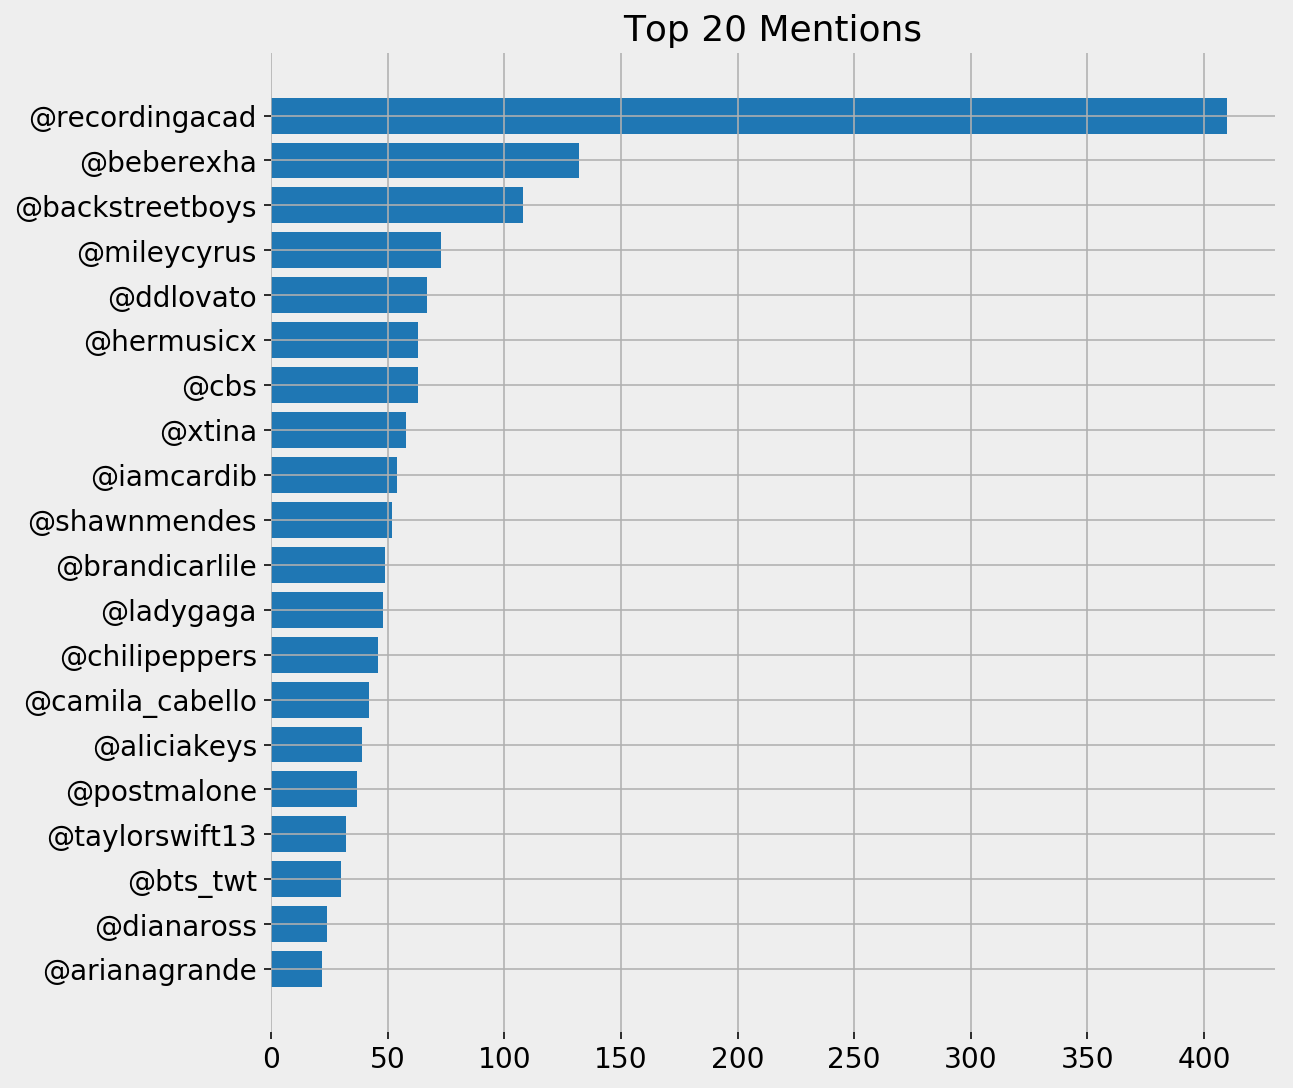

In [36]:
fig, ax = plt.subplots(facecolor='#eeeeee')
fig.set_size_inches((9, 9))
ax.set_frame_on(False)
ax.barh([x[0] for x in mention_summary['top_mentions'][:20]][::-1],
        [x[1] for x in mention_summary['top_mentions'][:20]][::-1])
ax.tick_params(labelsize=14)
# ax.xaxis.set_ticks(range(21))
ax.set_title('Top 20 Mentions', fontsize=18)
ax.grid()
plt.show()

It is expected to have the official account as one of top mentioned accounts, and here are the top tweets that mention them.

In [37]:
pd.set_option('display.max_colwidth', 280)
(grammys
 [grammys['tweet_full_text'].str.contains('@recordingacad', case=False)]
 .sort_values('user_followers_count', ascending=False)
 [['user_followers_count', 'user_screen_name', 'tweet_full_text', 'user_verified']]
 .head(10)
 .style.format({'user_followers_count': '{:,}'}))

,user_followers_count,user_screen_name,tweet_full_text,user_verified
2495,"7,835,551",Camila_Cabello,as a mastercard partner im soo excited to announce an exclusive show just for Mastercard cardholders during the @RecordingAcad #GRAMMYs week in LA at the orpheum 💜 get your tickets NOW by visiting @Mastercard & clicking on the link in their bio...! see you there 💫 https://t.co/Eufem8SdTC,True
1825,"5,165,984",MTVNEWS,The @RecordingAcad #GRAMMYs are approaching and we’ve got everything you need to know before tuning in to music’s biggest awards show https://t.co/uCWY7Eqwer,True
1500,"874,648",Vh1India,Think you were Born For The GRAMMYs? Last chance to witness the @RecordingAcad LIVE. Participate in the #Vh1TicketToRide to the 61st GRAMMYs now - https://t.co/aAfu0Qfwfp #Vh1India #BadBunny #GRAMMYs #Vh1TicketToRide #GRAMMYs2019 #TicketToRideToGRAMMYs #GRAMMYsOnVh1 #GetWithIt https://t.co/4uEMEV9mMY,True
1303,"874,648",Vh1India,.@JanelleMonae has nominated for the Album Of The Year & Best Music Video for the 61st GRAMMYs! Watch the GRAMMY Nominees Special on #Vh1India now. Track ID: PYNK @RecordingAcad #GRAMMys #Vh1India #JanelleMonae #PYNK #MusicVideo #nomineesSpecial #GetWithIt https://t.co/yUxTMem49V,True
595,"874,648",Vh1India,"Watch our Rockstar - @PostMalone perform at the 61st GRAMMY Awards! @RecordingAcad LIVE on Vh1 India 11 Feb, 7:30 AM, Repeat 9 PM. #Vh1India #Rockstar #PostMalone #GRAMMYs #GRAMMYsOnVh1 #GetWithIt https://t.co/h9kYaidqHo",True
321,"874,648",Vh1India,"LET’S HEAR IT FOR THE WORLD’S MOST AWAITED AWARD SHOW! Tune into the 61st GRAMMYs on 11 Feb 7:30 AM, Repeat at 9 PM only on #Vh1India. @RecordingAcad #Vh1 #GRAMMYs #GRAMMYsOnVh1 #GRAMMYs2019 #GetWithIt https://t.co/piw9blcQdD",True
2377,"874,648",Vh1India,Only 3 days left for #TicketToRide to The GRAMMYs contest! - https://t.co/aAfu0Qx76X. All The Stars are alligned for @kendricklamar with 8 @RecordingAcad Nominations this year! #Vh1India #GRAMMYs #KendrickLamar #Vh1TicketToRideToGRAMMYs #AllTheStars #GRAMMYsOnVh1 #GetWithIt https://t.co/632XoBhdCu,True
1336,"874,648",Vh1India,.@PostMalone & @ChiliPeppers will be performing together at the 61st GRAMMY Awards! How about a Rockstar & Can't Stop mash-up? Tune in to #Vh1India 7 PM today to watch @RecordingAcad Nominees Special. #Vh1India #PostMalone #RedHotChiliPeppers #GRAMMYs #GRAMMYsOnVh1 #GetWithIt https://t.co/lyW3gppfpk,True
890,"874,648",Vh1India,"Experience an explosion of your senses! It's time for the Biggest Award Show in music - The 61st GRAMMY Awards. 11 February 7:30 AM, Repeat 9 PM. @RecordingAcad #Vh1India #GRAMMYs #AwardShow #GRAMMYsOnVh1 #GRAMMYs2019 #GetWithIt https://t.co/uABRJOJzGQ",True
1928,"874,648",Vh1India,".@iamcardib is all set to rev it up at the 61st GRAMMY Awards! Tune in to #Vh1India on 28 Jan, 7 PM & watch @RecordingAcad Nominees Special. Participate in the #Vh1TicketToRide to 61st GRAMMY Awards now - https://t.co/aAfu0Qfwfp #Vh1India #GRAMMYs #CardiB #GRAMMYsOnVh1 https://t.co/cNTkFz9nif",True


Here are the tweets mentioning @BebeRexha, the second account 

In [38]:
pd.set_option('display.max_colwidth', 280)
(grammys
 [grammys['tweet_full_text'].str.contains('@beberexha', case=False)]
 .sort_values('user_followers_count', ascending=False)
 [['user_followers_count', 'user_screen_name', 'tweet_full_text']]
 .head(10)
 .style.format({'user_followers_count': '{:,}'}))

,user_followers_count,user_screen_name,tweet_full_text
2474,"6,081,578",PerezHilton,"Designers reach out to @BebeRexha after she revealed she couldn't get a #Grammys dress because some deemed her ""too big."" https://t.co/mTKd3Mwm08"
2230,"5,165,984",MTVNEWS,".@BebeRexha is speaking out against designers who won't dress her for the #GRAMMYs because they say her size 6/8 frame is ""too big."" @Dometi_ has what you #NeedtoKnow about how Bebe is standing up for body representation and winning https://t.co/cdRehc4qhc"
2716,"3,601,277",GMA,.@BebeRexha fights back; singer says designers won't dress her for the #GRAMMYs because she's a size 8. https://t.co/tML0XkKL5C https://t.co/UN39MB0hMC
2436,"1,464,630",etnow,"Designers are refusing to dress @BebeRexha for the #GRAMMYs because she's ""too big,"" but @mikecostello is ready to help his friend SLAY the red carpet. 👏👏 https://t.co/pnyNyaf714 https://t.co/XaIgvvUtl6"
2437,"749,547",JustJared,.@ddlovato is speaking out to support @BebeRexha after she slammed designers who body-shamed her over her #Grammys dress. https://t.co/1jaDSdoBxO
2600,"641,979",TwitterMoments,Several designers have said they would like to dress @BebeRexha after she said some have refused to dress her for the 2019 #GRAMMYs because she’s “too big.” https://t.co/tMwLYLd3r0
2453,"297,783",FOX26Houston,#TheBreak w/ @carolinaszv - #Venezuela chaos - #NancyPelosi: no to #SOTU - #BebeRexha fat shamed by #designers - #Women sizes & life expectancy - #Valentines #hearts gone - Used tissues to fight sickness? #Trump #Maduro #Guaido #Politics #International @BebeRexha #Grammys https://t.co/HYXc8EHDfw
1811,"287,353",PopCrave,#DemiLovato & @LaurenJauregui show love to @BebeRexha after designers refused to make a #GRAMMYs dress for her. https://t.co/mAqColRSBB
2362,"181,652",Daily_Star,Demi Lovato lets rip after Bebe Rexha brutally fat-shamed for Grammy dress #DemiLovato #BebeRexha #GRAMMYs @ddlovato @BebeRexha https://t.co/H9fBVeU6Cb https://t.co/jaHnas8jl7
300,"87,242",semrush,"According to #SEMrush data, these are the most searched #Grammy artists in the US! 📣 #SEMrushstats #GRAMMYs @DUALIPA, @BebeRexha, @GretaVanFleet, @lukecombs https://t.co/whEFEx3yDm"


Now we can check the effect of the questions and answers on @BackstreetBoys

In [39]:
pd.set_option('display.max_colwidth', 280)
(grammys
 [grammys['tweet_full_text'].str.contains('@backstreetboys', case=False)]
 .sort_values('user_followers_count', ascending=False)
 [['user_followers_count', 'user_screen_name', 'tweet_full_text']]
 .head(10)
 .style.format({'user_followers_count': '{:,}'}))

,user_followers_count,user_screen_name,tweet_full_text
100,"2,802,919",RecordingAcad,@backstreetboys If you could perform with anyone at the #GRAMMYs who would it be with? #GRAMMYsAskBSB
126,"2,802,919",RecordingAcad,We're 15 minutes away from our Q&A with the @backstreetboys. 🎶 Tweet your questions using #GRAMMYsAskBSB! #GRAMMYs https://t.co/icdWb5265v
1182,"749,547",JustJared,.@backstreetboys open up about their unexpected #GRAMMYs nomination - their first since 2002 - on @LiveKellyRyan - Watch here: https://t.co/TyYEPyMTX6
713,"364,889",ETCanada,Watch: The @BackstreetBoys open up about their 2019 #GRAMMYs nomination and their soon-to-be chart-topping #DNA album https://t.co/RCSGUZhE7b https://t.co/0aZec5xKk7
2050,"56,491",Lauren_Kitt,#BSBDNA my favorite song on the album is #NewLove @backstreetboys @nickcarter #NickCarter #GRAMMYs https://t.co/geUMzUG7KH
1835,"56,491",Lauren_Kitt,@billboard @backstreetboys Album of the year!!!! #BSBDNA @backstreetboys #rocknrollhalloffame #GRAMMYs #nickCarter
2429,"21,081",1033ampradio,"#GRAMMYs : Vote for best pop duo/group performance Ok all these categories are hard to choose from but this is REALLLY hard!! @xtina x @ddlovato, @backstreetboys, @ladygaga x #BradleyCooper, @maroon5 x @iamcardib & more to choose from VOTE 👇 https://t.co/WRGeM682QN"
2041,"21,081",1033ampradio,"#GRAMMYs : Vote for best pop duo/group performance Ok all these categories are hard to choose from but this is REALLLY hard!! @xtina x @ddlovato, @backstreetboys, @ladygaga x #BradleyCooper, @maroon5 x @iamcardib & more to choose from VOTE 👇 https://t.co/WRGeM6pDIl"
2445,"13,963",Mix1041,.@ddlovato @xtina @backstreetboys @jtimberlake @ChrisStapleton ALL up for 'Best Pop Duo/Group Performance' #GRAMMYs https://t.co/0aKF3BDyvi
354,"11,943",GJP_recordz,@backstreetboys are going to be doing a little #GRAMMYs Q&A tomorrow at 2PM PST! Ask some questions using #GRAMMYsAskBSB 🙌🏻 #BSBDNA Via @TwitterMusic #Usa / #India / #Australia #Canada / #Uk / #Asia #Twitter / #Music https://t.co/ogxJyNZrU8


## Word Frequency

Now let's start counting the words and try to see what were the most used words on an absolute and a weighted count basis.  
The `word_frequency` function takes a text list and a number list as its main arguments. It excludes a list of English stopwords by default, which is a list that you can modify as you like. `advertools` provides lists of stopwords in several other languages, in case you are working in a language other than English. As you can see below, I have used the default set of English stopwords, and added my own.

In [40]:
word_freq = adv.word_frequency(grammys['tweet_full_text'],
                               grammys['user_followers_count'],
                               rm_words=adv.stopwords['english'] + 
                               [ '&amp;',]) 
word_freq.head(20).style.format({'wtd_freq': '{:,}', 'rel_value': '{:,}'})

,word,abs_freq,wtd_freq,rel_value
0,#grammys,2518,"383,310,651","152,228.0"
1,2019,223,"88,762,964","398,040.0"
2,grammy,274,"82,541,620","301,247.0"
3,feb.,55,"56,197,140","1,021,766.0"
4,year's,62,"50,312,333","811,489.0"
5,nominees,90,"42,952,193","477,247.0"
6,red,80,"41,821,626","522,770.0"
7,performing,107,"37,939,137","354,571.0"
8,61st,119,"36,740,304","308,742.0"
9,hot,47,"34,845,813","741,400.0"


You can clearly see that the most used words are not necessarily the same when weighted by the number of followers. In some cases, like the top three, these words are the most frequent on both measures. In general these are not interesting because we already expect a conversation about the Grammys to include such words.  
Evaluating each occurrence of a word is done by the last column `rel_value`, which basically divides the weighted by the absolute frequency, to come up with a per-occurrence value of each word. In this case "music's" and "feb." have very high relative values.    
The first six words are expected, but "red" seems interesting. Let's see what people have to say.

In [41]:
(grammys
 [grammys['tweet_full_text']
  .str.contains(' red ', case=False)]
 .sort_values('user_followers_count')
 [['user_screen_name', 'user_name', 'user_followers_count', 'tweet_full_text']]
 .sort_values('user_followers_count', ascending=False)
 .head(10)
 .style.format({'user_followers_count': '{:,}'}))

,user_screen_name,user_name,user_followers_count,tweet_full_text
1535,billboard,billboard,"7,022,643","Miley Cyrus, Brandi Carlile, H.E.R. & Red Hot Chili Peppers will be performing at the 2019 #GRAMMYs https://t.co/8PexL82LIW https://t.co/29XWMvcmOi"
2284,billboard,billboard,"7,022,643",".@MileyCyrus, @brandicarlile, @HERMusicx & Red Hot @ChiliPeppers added as 2019 #GRAMMYs performers https://t.co/YwVOXF3uNm https://t.co/0GrLAbG56x"
2904,RecordingAcad,Recording Academy / GRAMMYs,"2,802,919","While the #GRAMMYs are ALL about the music, we want to know: Who are you most excited to see walk the 2019 GRAMMY Awards red carpet? 👇👇👇 https://t.co/251SB9srYE"
2357,RecordingAcad,Recording Academy / GRAMMYs,"2,802,919","You heard it here first! 🙌 @HERMusicx, Red Hot @ChiliPeppers, @brandicarlile, and @MileyCyrus will be performing at this year's #GRAMMYs. 🎤 Watch Music's Biggest Night Feb. 10 on @CBS: https://t.co/02M2vlLHa5"
2027,RecordingAcad,Recording Academy / GRAMMYs,"2,802,919","While we enjoy red carpet fashion and acceptance speeches, we want to know: What's your favorite classic #GRAMMYs performance? 👇👇👇 https://t.co/EvUQHHqmVI"
2066,RecordingAcad,Recording Academy / GRAMMYs,"2,802,919",".@HERMusicx, Red Hot @ChiliPeppers, @brandicarlile, and @MileyCyrus will be performing at this year's #GRAMMYs. 🎤 Watch Music's Biggest Night Feb. 10 on @CBS: https://t.co/JeMgCRFWz5"
2338,RecordingAcad,Recording Academy / GRAMMYs,"2,802,919",The Red Hot @ChiliPeppers return to the #GRAMMYs stage! 🎶 Don't miss their performance Feb. 10 on @CBS: https://t.co/02M2vm3i1D https://t.co/IM9FLBk7qr
2436,etnow,Entertainment Tonight,"1,464,630","Designers are refusing to dress @BebeRexha for the #GRAMMYs because she's ""too big,"" but @mikecostello is ready to help his friend SLAY the red carpet. 👏👏 https://t.co/pnyNyaf714 https://t.co/XaIgvvUtl6"
1140,iHeartRadio,iHeartRadio,"1,433,179",Miley Cyrus and the Red Hot Chili Peppers are set to take the stage at the 2019 #GRAMMYs! https://t.co/oN3B3ywcki
1737,YahooEnt,Yahoo Entertainment,"644,151",The most iconic looks celebrities have rocked on the #GRAMMYs red carpet https://t.co/424OMpOmr3 https://t.co/hr3cciZS81


Mostly Red Hot Chili Peppers, and some red carpet mentions.  
Feel free to replace "red" with any other word you find interesting and make your own observations.  


## Entity Frequency 
Now let's combine both topics. We will run `word_frequency` on the entities that we extracted and see if we get any interesting results.  
The below code creates a new DataFrame that has the users names and follower counts. It also has a column for each of the extracted entities, which we will count now. It's the same process as above, but we will be dealing with entity lists as if they were tweets. 

In [42]:
entities = pd.DataFrame({
    'user_name': grammys['user_name'],
    'user_screen_name': grammys['user_screen_name'],
    'user_followers': grammys['user_followers_count'],
    'hashtags': [' '.join(x) for x in hashtag_summary['hashtags']],
    'mentions': [' '.join(x) for x in mention_summary['mentions']],
    'emoji': [' '.join(x) for x in emoji_summary['emoji']],
    'emoji_text': [' '.join(x) for x in [[y.replace(' ', '_') for y in z] for z in emoji_summary['emoji_text']]],
}) 
entities.head(15)

,user_name,user_screen_name,user_followers,hashtags,mentions,emoji,emoji_text
0,Michael Miller,MLMikeMilli,116,#invasionofprivacy #scorpion #astroworld #nofiller #grammys,@iamcardib @drake @trvisxx,,
1,cardi b's invasion of privacy,DisIsOurKingdom,28,#grammys,@wildaboutmusic @iamcardib,,
2,Guillaera News,guillaeranews,11900,#grammys #drake #cardib,@thegrammys @drake @badbunny15 @jbalvin,,
3,Susmit,PossibleBuddy,874,#grammysaskluke #grammys,@lukecombs @recordingacad,,
4,Ajaye Skeene,Therealajaye_,2418,#tbt #damn #kendricklamar #grammys #iconic #legendary #rap,@charmladonna,💯 ✊🏾 ✊🏾 ✊🏾,hundred_points raised_fist_medium-dark_skin_tone raised_fist_medium-dark_skin_tone raised_fist_medium-dark_skin_tone
5,Tony's #1 Stan,fangirlonloose_,282,#grammys,,,
6,Susmit,PossibleBuddy,874,#grammysaskluke #grammys,@lukecombs @recordingacad,,
7,Michael Miller,MLMikeMilli,116,#nofiller #grammys,@youtube @iamcardi @recordingacad,,
8,Mark Reed,MarkReedEnt,642,#grammys #grammyweek,,,
9,Marcos Luis™,MarcosLuis,5687,#grammys #music,@dianaross @recordingacad,,


In [43]:
(adv.word_frequency(entities['mentions'], 
                    entities['user_followers'])
 .head(10)
 .style.format({'wtd_freq': '{:,}', 'rel_value': '{:,}'}))

,word,abs_freq,wtd_freq,rel_value
0,@hermusicx,63,"50,739,200","805,384.0"
1,@mileycyrus,73,"50,183,973","687,452.0"
2,@chilipeppers,46,"30,332,328","659,398.0"
3,@brandicarlile,49,"27,264,687","556,422.0"
4,@recordingacad,410,"26,317,105","64,188.0"
5,@postmalone,37,"22,904,837","619,050.0"
6,@beberexha,132,"19,472,936","147,522.0"
7,@littlebigtown,21,"18,090,410","861,448.0"
8,@dianaross,24,"17,328,736","722,031.0"
9,@torikelly,16,"17,249,509","1,078,094.0"


Now we get a few hidden observations that would have been difficult to spot had we only counted mentions on an absolute basis.  
@recordingacad, the most mentioned account, ranks fifth on a weighted basis, although it was mentioned more than six times the mentions of @hermusicx.  
Let's do the same with hashtags.

In [44]:
(adv.word_frequency(entities['hashtags'], 
                    entities['user_followers'])
 .head(10)
 .style.format({'wtd_freq': '{:,}', 'rel_value': '{:,}'}))

,word,abs_freq,wtd_freq,rel_value
0,#grammys,2941,"489,008,314","166,273.0"
1,#grammysasklbt,18,"16,482,137","915,674.0"
2,#vh1india,15,"12,257,015","817,134.0"
3,#grammysasktori,10,"8,839,845","883,984.0"
4,#getwithit,10,"8,746,480","874,648.0"
5,#letshearit,23,"8,491,967","369,216.0"
6,#grammysonvh1,9,"7,871,832","874,648.0"
7,#grammysaskbsb,79,"7,599,476","96,196.0"
8,#hot100,5,"7,023,627","1,404,725.0"
9,#chartbeat,3,"7,023,394","2,341,131.0"


#grammysasklbt appears to be much more popular than #grammysaskbsb on a weighted basis, and the #Grammysasks hashtags are all in the top eight.

In [45]:
(adv.word_frequency(entities['emoji'], 
                    entities['user_followers'])
 .head(10)
 .style.format({'wtd_freq': '{:,}', 'rel_value': '{:,}'}))

,word,abs_freq,wtd_freq,rel_value
0,🎶,56,"42,759,218","763,557.0"
1,👇,26,"28,211,749","1,085,067.0"
2,✨,46,"24,950,081","542,393.0"
3,🙌,30,"20,521,519","684,051.0"
4,🏆,198,"16,539,124","83,531.0"
5,🔥,78,"10,998,411","141,005.0"
6,💫,11,"7,879,448","716,313.0"
7,💜,34,"7,868,116","231,415.0"
8,💕,19,"5,981,937","314,839.0"
9,🎤,23,"5,849,046","254,306.0"


In [46]:
(adv.word_frequency(entities['emoji_text'], 
                    entities['user_followers'], sep=' ')
 .head(11)
 .tail(10)
 .style.format({'wtd_freq': '{:,}', 'rel_value': '{:,}'}))

,word,abs_freq,wtd_freq,rel_value
1,musical_notes,56,"42,759,218","763,557.0"
2,backhand_index_pointing_down,26,"28,211,749","1,085,067.0"
3,sparkles,46,"24,950,081","542,393.0"
4,raising_hands,30,"20,521,519","684,051.0"
5,trophy,198,"16,539,124","83,531.0"
6,fire,78,"10,998,411","141,005.0"
7,dizzy,11,"7,879,448","716,313.0"
8,purple_heart,34,"7,868,116","231,415.0"
9,two_hearts,19,"5,981,937","314,839.0"
10,microphone,23,"5,849,046","254,306.0"


### Summary

We have explored two main techniques to analyze text, and used tweets to see how they can be implented practically. We have seen how difficult it is to get a balanced data set that represents the most important and relevant views. But once you get a data set that you are confident is representative enough, it is very easy to get powerful insights about word usage, counts, emoji, mentions, and hashtags. Counting by weighing the words with a certain metric makes it more meaningful and makes your job easier. These insights can be easily extracted with very little code.  

Here are some recommendations for text analysis while using the above techniques: 

**1. Domain knowledge:** No amount of number crunching or data analysis technique is going to help you if you don't know your topic. Looking at numbers alone, we might have concluded something ridiculous like a correlation between shutdown stories and hamburger emoji. In your day to day work with your, or your client's brands, you are likely to know the industry, its main players, and how things work. Make sure you have a good understanding before you make conclusions, or simply use the findings to learn more about the topic at hand.  
**2. Long periods / more tweets:** Some topics are very timely. Sports events, political events (like the one discussed here), have a start and end date. In these cases you would need to get data more frequently; once a day, and sometimes more than once a day (The Oscars for instance). In cases where you are handling a generic topic, like fashion, electronics, or health, things tend to be more stable, and you wouldn't need to make very frequent requests for data. You can judge best based on your situation.  
**3. Run continuously:** If you are managing a social media account for a certain topic, I suggest that you come up with a template, like the process we went through here, and do it everyday. If you want to run the same analysis on a different day, you don't have to write any code, you can simply run it again and build on the work I did. The first time takes the most work, and then you can tweak things as you go. This way you would know the pulse of your industry everyday by running the same analysis in the morning for example. This can help a lot in planning your day to quickly see what's trending in your industry, and who's influential on that day.  
**4. Run interactively:** An offline data set is almost never good enough. As we saw here, there were several instances where I had to request other / more data. There were also cases (Donald Trump tweets) where I should have imported his tweets as his views are important to this topic.   
**5. Engage:** I tried to be careful in making any conclusions, and I tried to show how things can be affected by one user or one tweet. At same time, remember that you are an online marketer and not a social scientist. We are not trying to understand society from a bunch of tweets, nor are we trying to come up with new theories (although that would be cool). Our typical challenges are figuring out what's important these days, who is influential and what to tweet about. I hope the techniques outlined here make this part of your job a little easier, and help you to better engage with your audience.  



